### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

### Business Goal
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Steps Involved in building logistic regression modle
1. Reading, understanding and visualising the data.
2. Preparing the data for modeling(train-test split, rescaling etc)
3. Training the module
4. Resudual analysis 
5. Prediction and evaluation on the test

In [1]:
# Supress warning
import warnings
warnings.filterwarnings('ignore')

###### Load the required python libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels 
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

In [3]:
#Some colour class for rendering print output
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#### Step 1 :- Read the data, Understand and Visualize the data


In [4]:
df1=pd.read_csv('Leads.csv')
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df1.shape

(9240, 37)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Lets see numeric columns statastics 
df1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Step 2 :- Cleaning the Data

In [8]:
# Create missing_percentage fuction which we use frequentely 
def missing_percentage(df):
    missing=pd.DataFrame(columns=['col_name','percentage'])
    for i in df.columns:
        if df[i].isna().values.any():
            percentage=df[i].isna().sum()/len(df) *100
            missing=missing.append({'col_name': i, 'percentage': percentage}, ignore_index=True)
    return missing

In [9]:
df1.isnull().sum().sort_values(ascending=0)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [10]:
round(df1.isnull().sum().sort_values(ascending=0)/len(df1)*100,2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [11]:
#check if any duplicate data present in dataframe
df1[df1.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [12]:
# Drop Coloumns which having more than 30% missing values.
#Lead Quality                                     51.59
#Asymmetrique Activity Index                      45.65
#Asymmetrique Profile Score                       45.65
#Asymmetrique Activity Score                      45.65
#Asymmetrique Profile Index                       45.65
#Tags                                             36.29

df1=df1.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Tags'], axis=1)

In [13]:
#check which are missing value till present in DF after initial dropping few columns.
round(df1.isnull().sum().sort_values(ascending=0)/len(df1)*100,2)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Ad

In [14]:
#For some columns , customers has not filled the values and instead of that they select 'Select' only
# That means they haven't given any input for that columns.
# Let's see how many columns has 'Select' word and what is the count of it.
for col in df1.columns:
    #print(col, 'total rows:', len(df1[col]))
    #df1[df1[col]=='Select'][col].value_counts()
    a=df1[df1[col]=='Select'][col].value_counts()
    if len(a) > 0:
        print(col)
        print(a)
        

Specialization
Select    1942
Name: Specialization, dtype: int64
How did you hear about X Education
Select    5043
Name: How did you hear about X Education, dtype: int64
Lead Profile
Select    4146
Name: Lead Profile, dtype: int64
City
Select    2249
Name: City, dtype: int64


In [15]:
# Following columns has value called 'Select', which means customers not selected any value for those rows, we can select NAN for those cell.
#Specialization
#How did you hear about X Education
#Lead Profile
#City
a=['Specialization','How did you hear about X Education','Lead Profile','City']
for i in a:
    df1[i] = df1[i].replace('Select', np.nan)


In [16]:
#check missing value
round(df1.isnull().sum().sort_values(ascending=0)/len(df1)*100,2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Ad

In [17]:
#After filling NAN for 'Select' , following 4 columns shows more than 30% missing values.
# We need to drop thos columns
#How did you hear about X Education               78.46
#Lead Profile                                     74.19
#City                                             39.71
#Specialization                                   36.58
df1=df1.drop(['How did you hear about X Education','Lead Profile','City','Specialization'], axis=1)

In [18]:
#check missing value
round(df1.isnull().sum().sort_values(ascending=0)/len(df1)*100,2)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper Article                                 0.00
Magazine  

In [19]:
missingdata_X=missing_percentage(df1)

In [205]:
missingdata_X[missingdata_X.sort_values('percentage', ascending=False)['percentage']>0]

,col_name,percentage
0,Lead Source,0.389610
1,TotalVisits,1.482684
2,Page Views Per Visit,1.482684
3,Last Activity,1.114719
4,Country,26.634199
5,What is your current occupation,29.112554
6,What matters most to you in choosing a course,29.318182


In [20]:
#let's see one-by-one above columns category in details
def print_valuecount(col):
    return df1[col].value_counts()

col_names=list(missingdata_X['col_name'])
for i in col_names:
    print(color.BOLD+color.BLUE+i+color.END)
    print(print_valuecount(i))

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0  

In [21]:
# Country columns has 70% data as 'India' and 26.62% missing data
# So we can drop the Country column
print(df1[df1['Country']=='India']['Country'].value_counts()/len(df1)*100)
df1=df1.drop('Country', axis=1)

India    70.25974
Name: Country, dtype: float64


In [22]:
# 'What matters most to you in choosing a course' has 70% data as 'Better Career Prospects' and 29.31% missing data
# so we can drop this column
print(df1[df1['What matters most to you in choosing a course']=='Better Career Prospects']['What matters most to you in choosing a course'].value_counts()/len(df1)*100)
df1=df1.drop('What matters most to you in choosing a course', axis=1)

Better Career Prospects    70.649351
Name: What matters most to you in choosing a course, dtype: float64


In [23]:
missing_percentage(df1)

,col_name,percentage
0,Lead Source,0.389610
1,TotalVisits,1.482684
2,Page Views Per Visit,1.482684
3,Last Activity,1.114719
4,What is your current occupation,29.112554


In [24]:
# What is your current occupation column has following category and also this columns has 29.11% missing values
# we can create new category in this columns as 'No Info'
#Unemployed              5600
#Working Professional     706
#Student                  210
#Other                     16
#Housewife                 10
#Businessman                8

df1['What is your current occupation']=df1['What is your current occupation'].replace(np.nan, 'No Info')

In [25]:
# Similarly For 'Last actvity' also we create new category 'No Info'
df1['Last Activity']=df1['Last Activity'].replace(np.nan, 'No Info')

In [26]:
missing_percentage(df1)

,col_name,percentage
0,Lead Source,0.389610
1,TotalVisits,1.482684
2,Page Views Per Visit,1.482684


In [27]:
df1['TotalVisits'].median()

3.0

In [28]:
df1['Page Views Per Visit'].median()

2.0

In [29]:
# Let impute 'TotalVisits' and 'Page Views Per Visit' to median values
df1['TotalVisits'] = df1['TotalVisits'].replace(np.nan, df1['TotalVisits'].median())
df1['Page Views Per Visit'] = df1['Page Views Per Visit'].replace(np.nan, df1['Page Views Per Visit'].median())

In [30]:
missing_percentage(df1)

,col_name,percentage
0,Lead Source,0.38961


In [31]:
df1['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [32]:
#From above it looks Google has two different names 'Google' and 'google', is same so we put 'Google' for 'google'.
#also Google is the major source for information , so we fill NAN value with Google.
df1['Lead Source'] = df1['Lead Source'].replace('google','Google')
df1['Lead Source'] = df1['Lead Source'].replace(np.nan, 'Google')

In [33]:
missing_percentage(df1)

,col_name,percentage


In [34]:
round(df1.isnull().sum().sort_values(ascending=0)/len(df1)*100,2)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                                   0.0
Do Not Call                             

In [35]:
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [36]:
def print_valuecount(col):
    return df1[col].value_counts()

col2_names=list(df1.columns)
for i in col2_names:
    print(color.BOLD+color.BLUE+i+color.END)
    print(print_valuecount(i))

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1

In [37]:
#Following columns has only 'NO' value in it, we can drop it
# 1) I agree to pay the amount through cheque
# 2) Get updates on DM Content
# 3) Update me on Supply Chain Content
# 4) Receive More Updates About Our Courses
# 5) Magazine

df1=df1.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Magazine'], axis=1)

In [38]:
df1.shape

(9240, 20)

##### Check Outlier

In [39]:
df1.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


#TotalVisits --> 95% to 99% = 70% increase                                       
#Page Views Per Visit --> 95% to 99% = 50% increase                                   
#Total Time Spent on Website --> 95% to 99% = 17% increase                                   

###### Outlier exists in TotalVisits and Page View Per Visit

<AxesSubplot:ylabel='Total Time Spent on Website'>

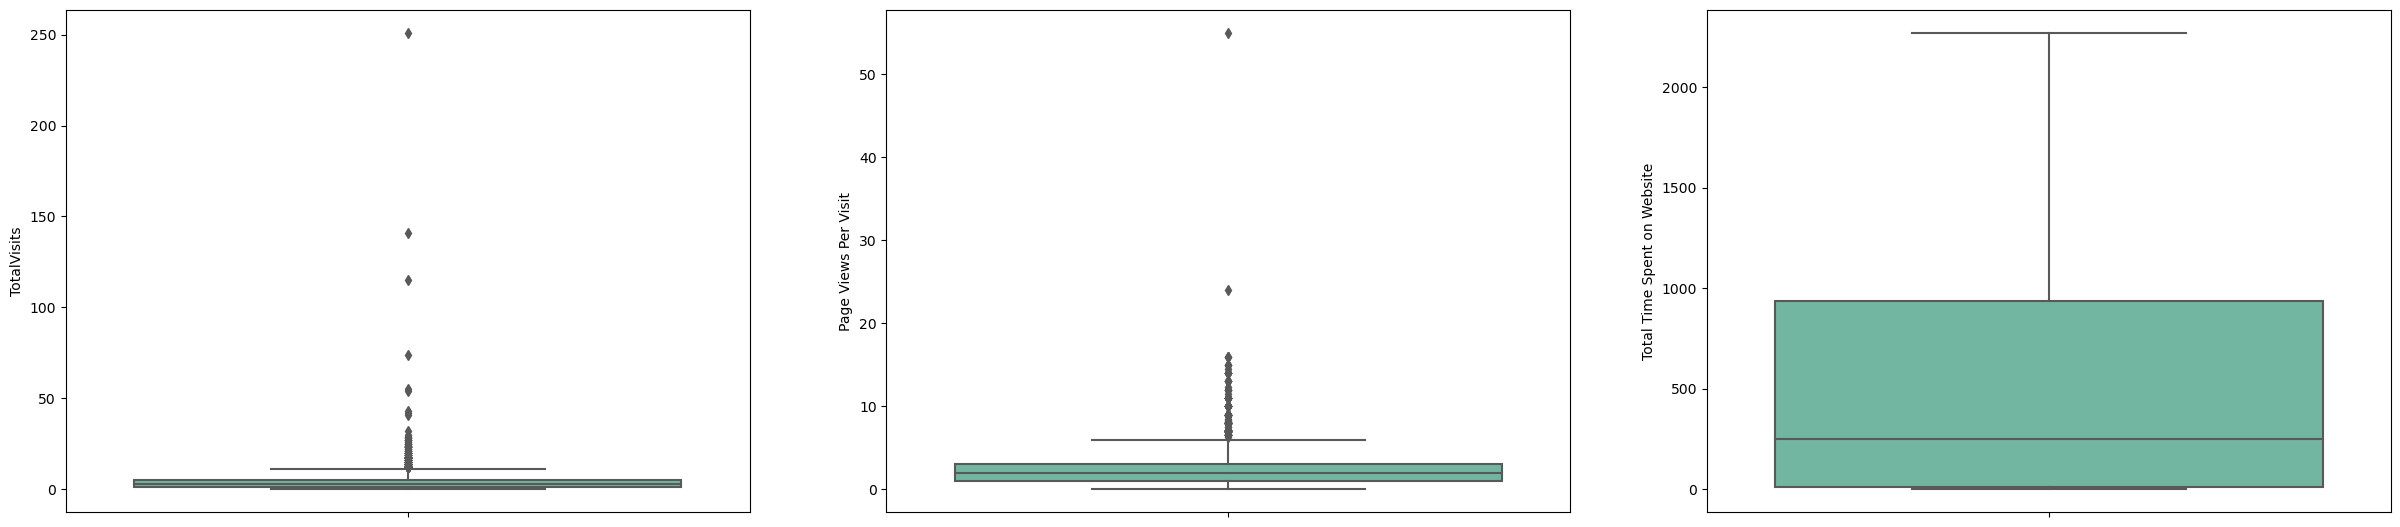

In [40]:
# Checking outlier in all numeric columns
plt.figure(figsize=(30,30))
plt.subplot(4,3,1)
sns.boxplot(y='TotalVisits', data=df1, palette='Set2')
plt.subplot(4,3,2)
sns.boxplot(y='Page Views Per Visit', data=df1, palette='Set2')
plt.subplot(4,3,3)
sns.boxplot(y='Total Time Spent on Website', data=df1, palette='Set2')

In [41]:
# Remove values beyond 99% for TotalVisits
TotalVisits_99quantile = df1['TotalVisits'].quantile(0.99)
df1 = df1[df1['TotalVisits'] < TotalVisits_99quantile]
df1['TotalVisits'].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [42]:
df1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [43]:
# Removing values beyond 99% for page Views Per Visit
Pageviews_99quantile = df1['Page Views Per Visit'].quantile(0.99)
df1 = df1[df1['Page Views Per Visit'] < Pageviews_99quantile ]
df1['Page Views Per Visit'].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [44]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [45]:
# Lets see percentage of data retained after removing mssing values, outliers
round(len(df1)/9240*100,2)

97.72

###### Around 98% of data retained at this level

### Step 3 Data Analysis 

In [46]:
# Check conversion rate with respect to each column
df1.shape

(9029, 20)

In [47]:
df1.Converted.value_counts()

0    5552
1    3477
Name: Converted, dtype: int64

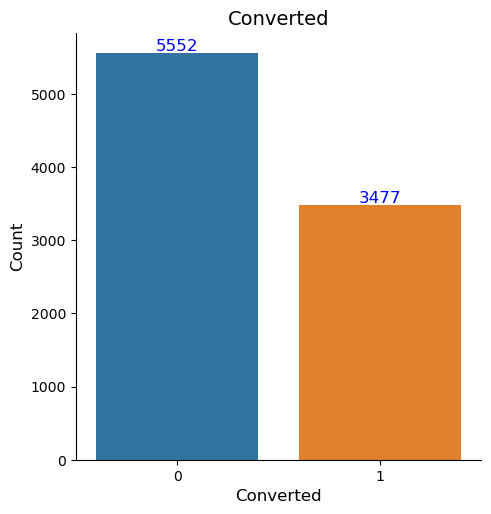

In [48]:
# Overall Convertion Rate
plot= sns.catplot(x='Converted', kind='count', data=df1)
plt.title('Converted', fontsize=14)
plt.xlabel('Converted', fontsize=12)
plt.ylabel('Count', fontsize=12)
ax = plot.facet_axis(0,0)
#print the count
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

In [235]:
# conversion rate
print(3477/(3477+5552)*100)

38.50924797873519


In [236]:
# Around 39% is overall convertion rate 

###### Landing Page submission has maximum conversion also Quick Add form has only one request and that is converted

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9029 non-null   object 
 1   Lead Number                             9029 non-null   int64  
 2   Lead Origin                             9029 non-null   object 
 3   Lead Source                             9029 non-null   object 
 4   Do Not Email                            9029 non-null   object 
 5   Do Not Call                             9029 non-null   object 
 6   Converted                               9029 non-null   int64  
 7   TotalVisits                             9029 non-null   float64
 8   Total Time Spent on Website             9029 non-null   int64  
 9   Page Views Per Visit                    9029 non-null   float64
 10  Last Activity                           9029 non-null   obje

In [50]:
col_graph = df1.select_dtypes(include='object').columns
col_graph=list(col_graph)
col_graph.remove('Prospect ID')
col_graph

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

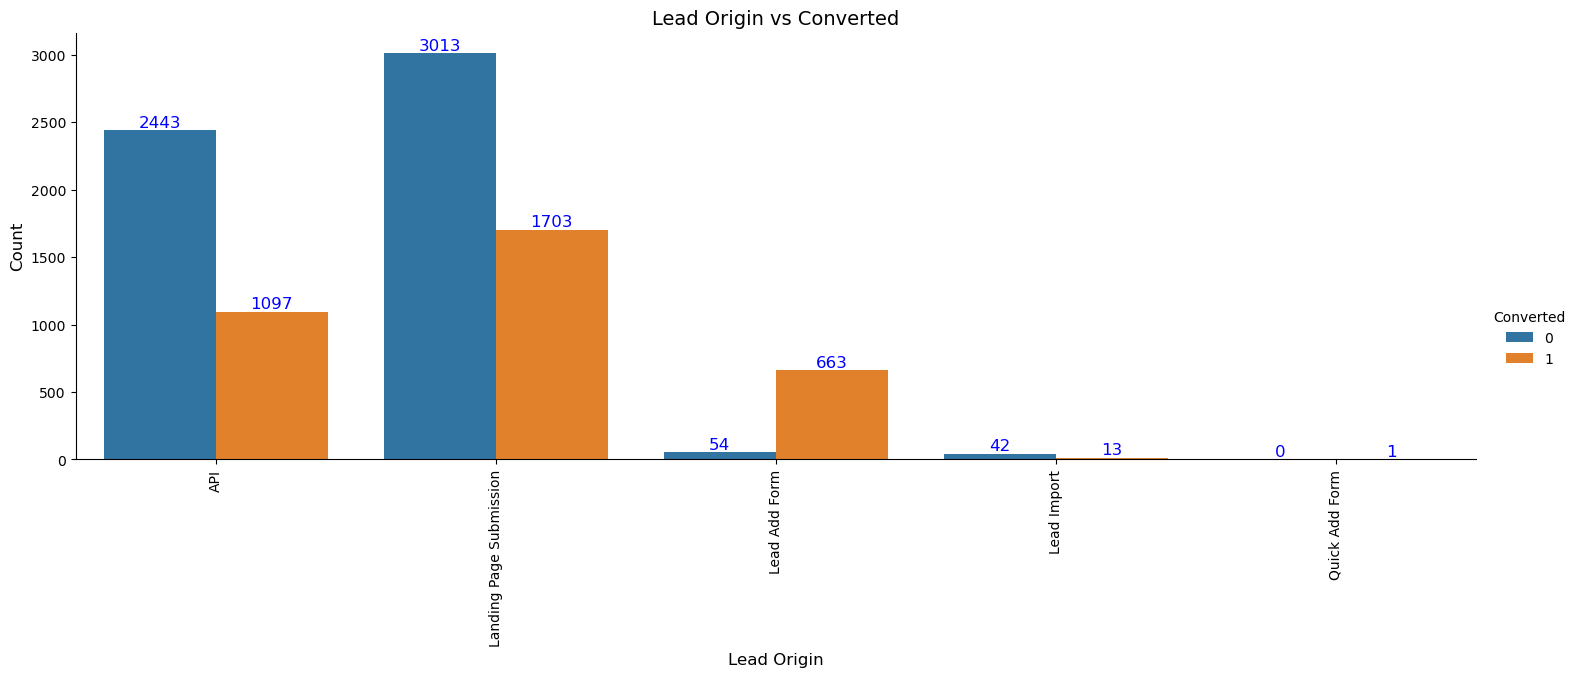

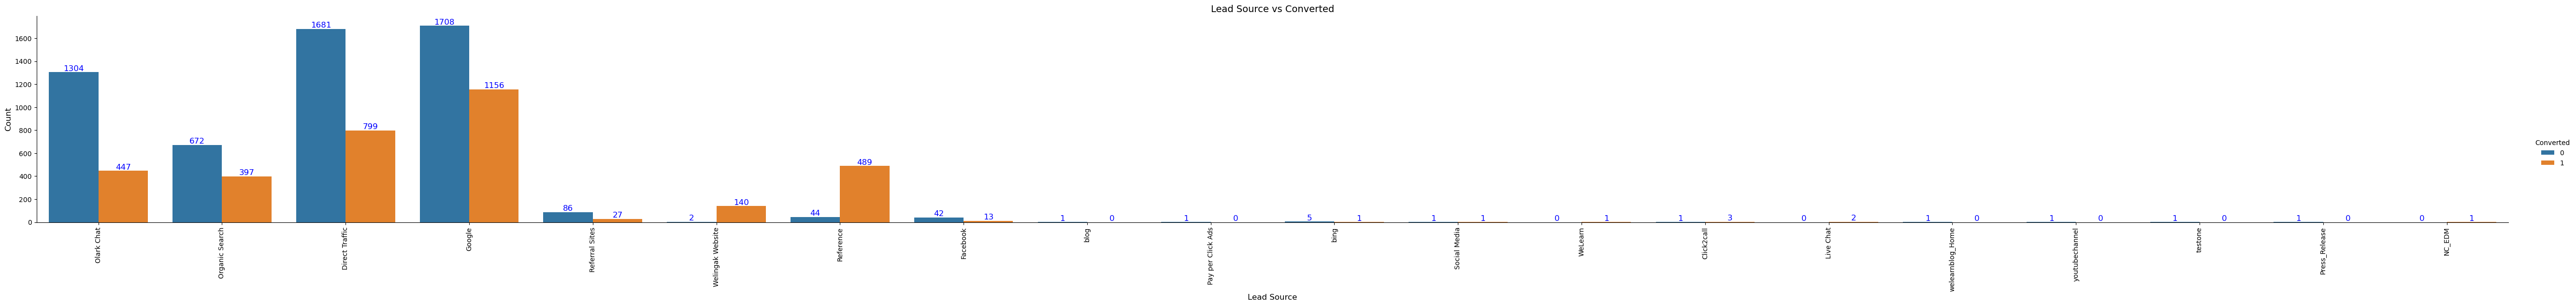

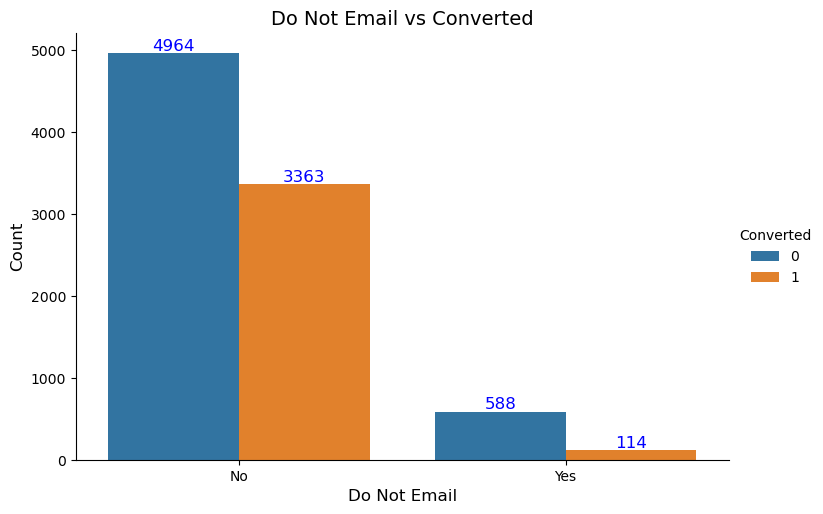

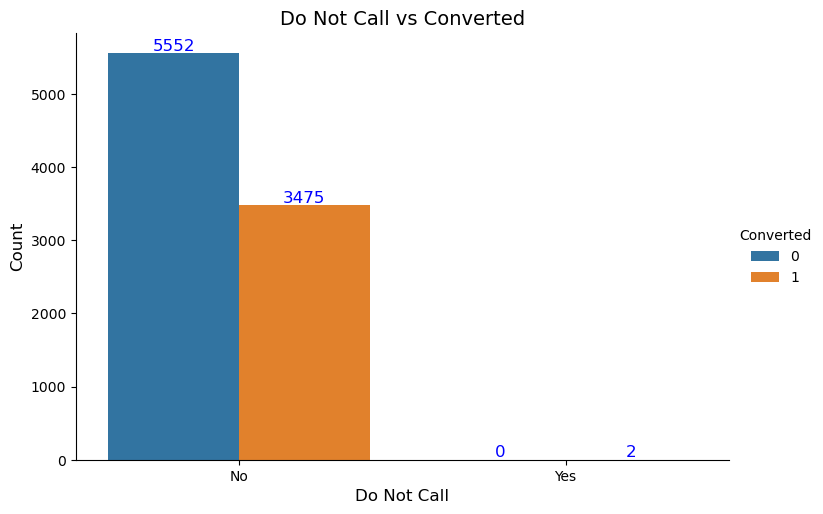

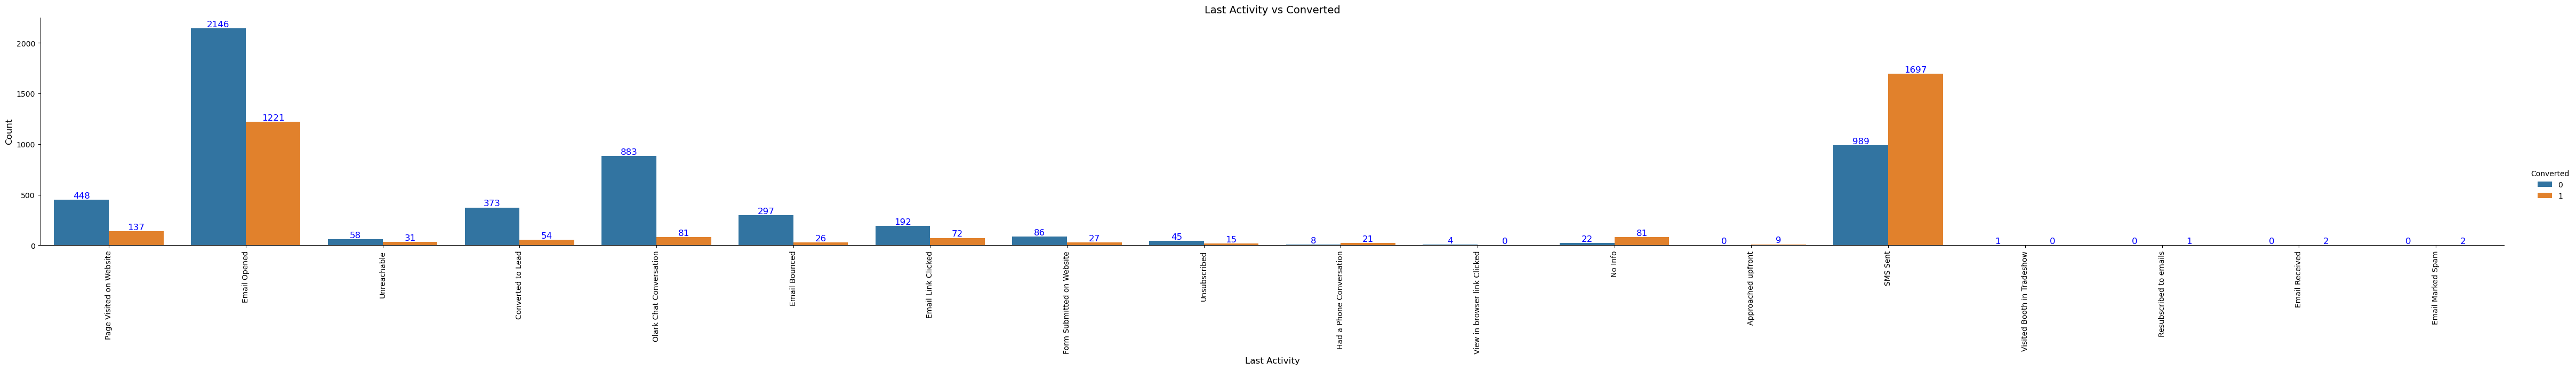

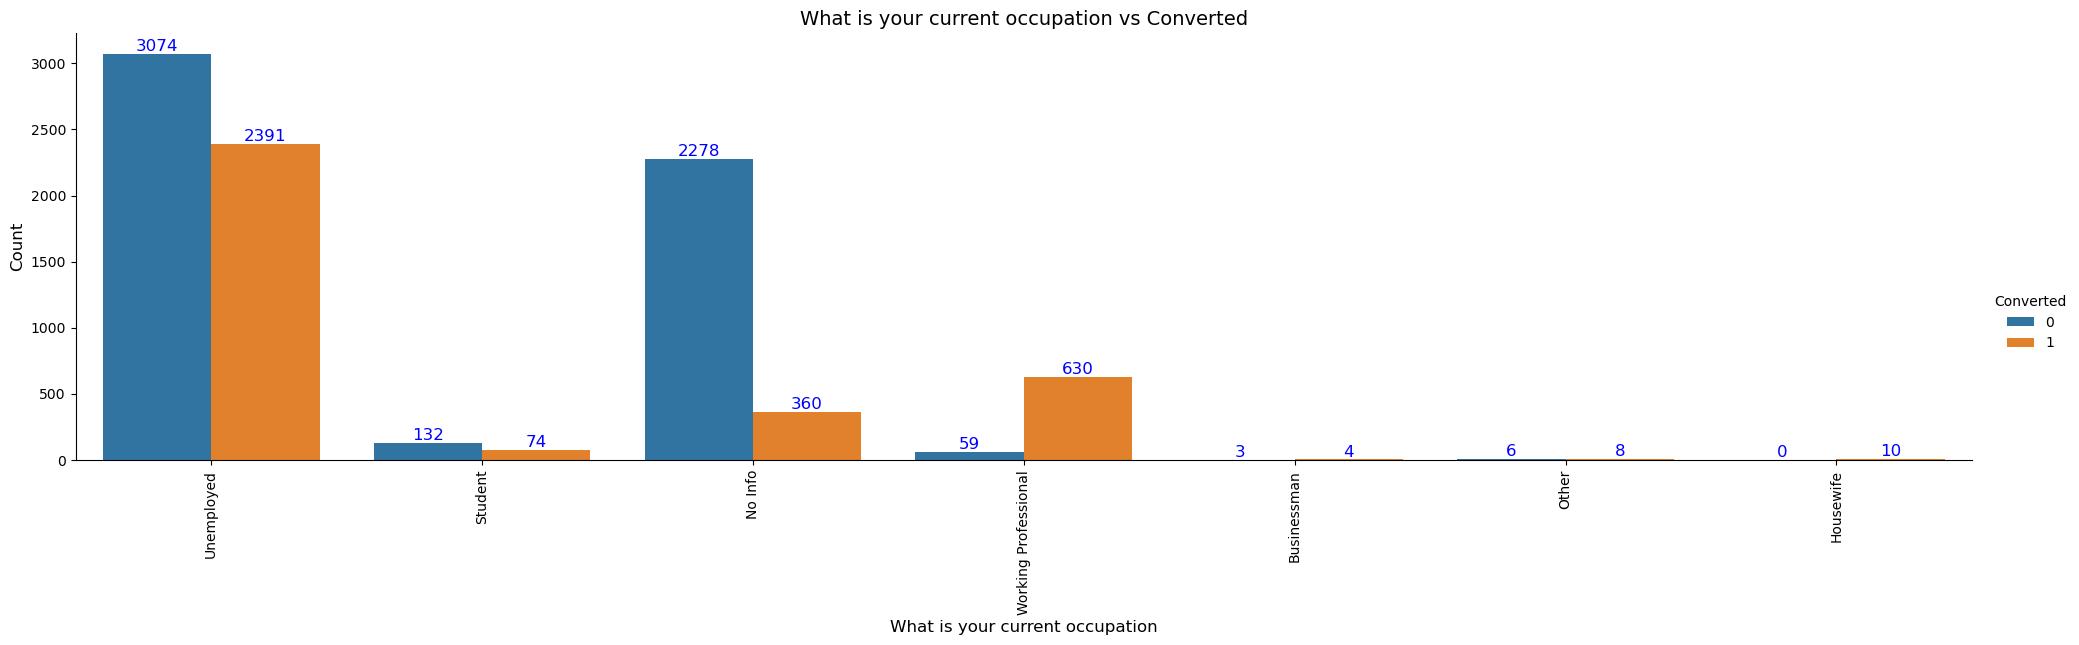

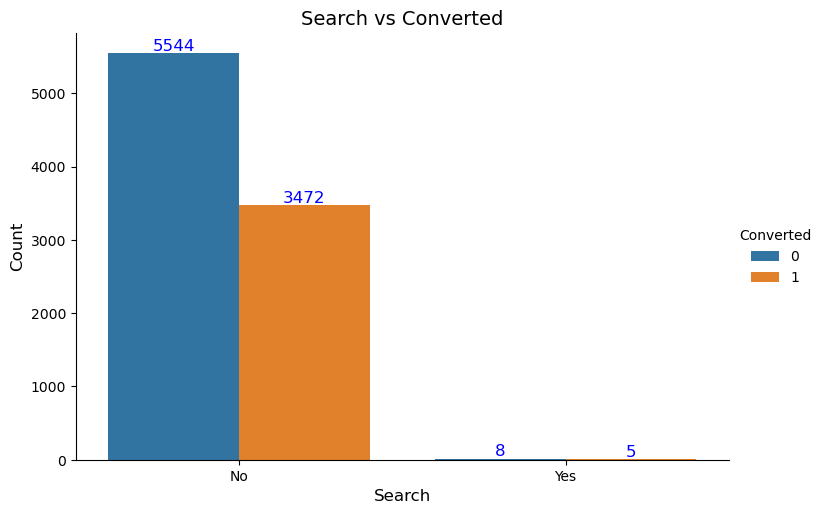

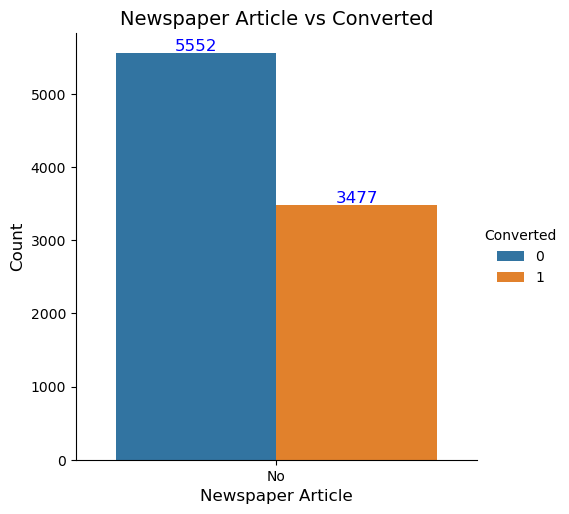

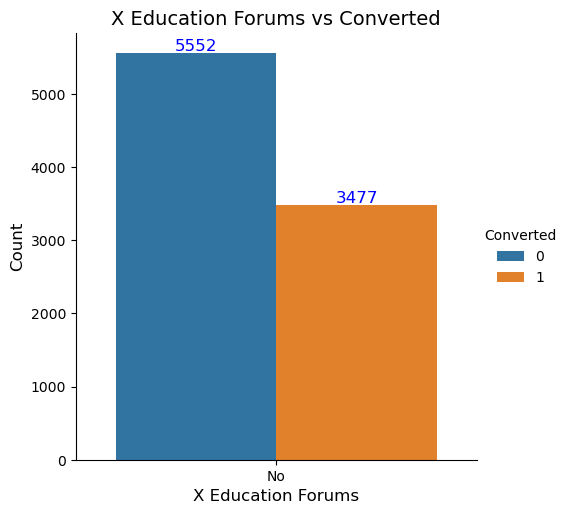

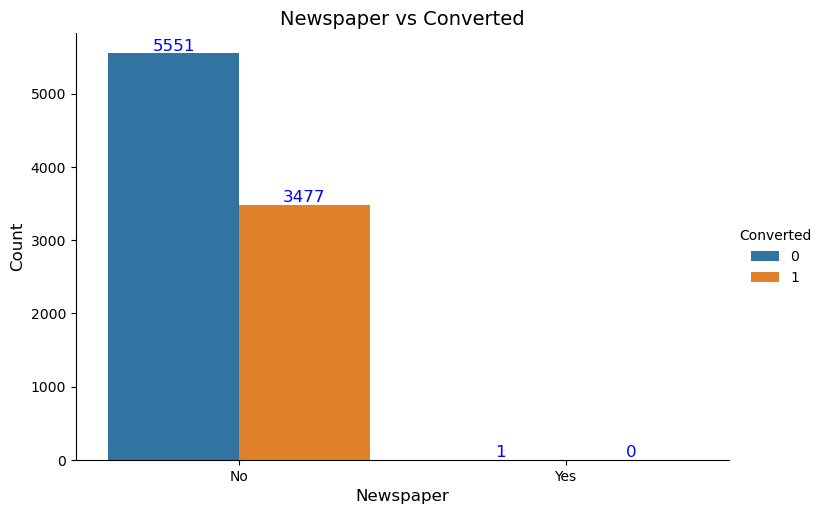

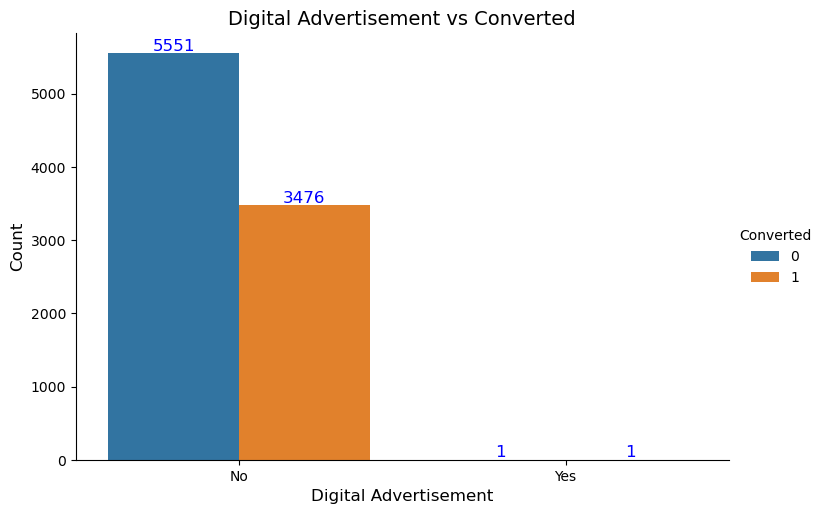

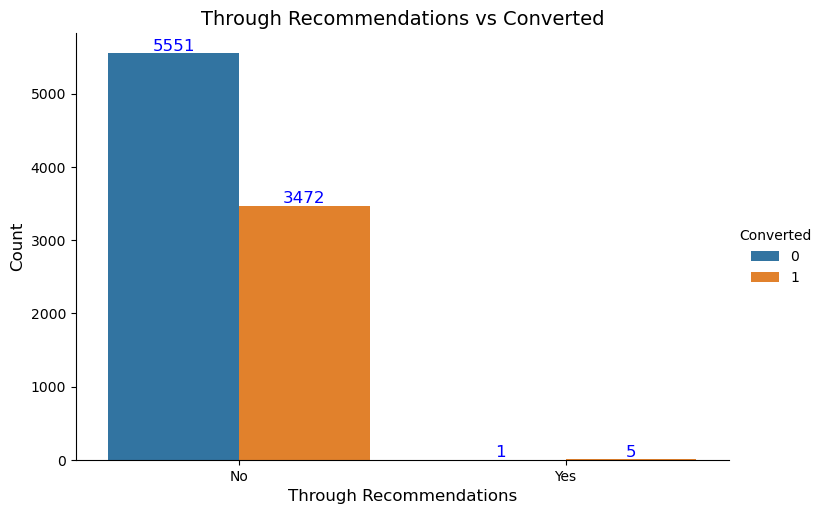

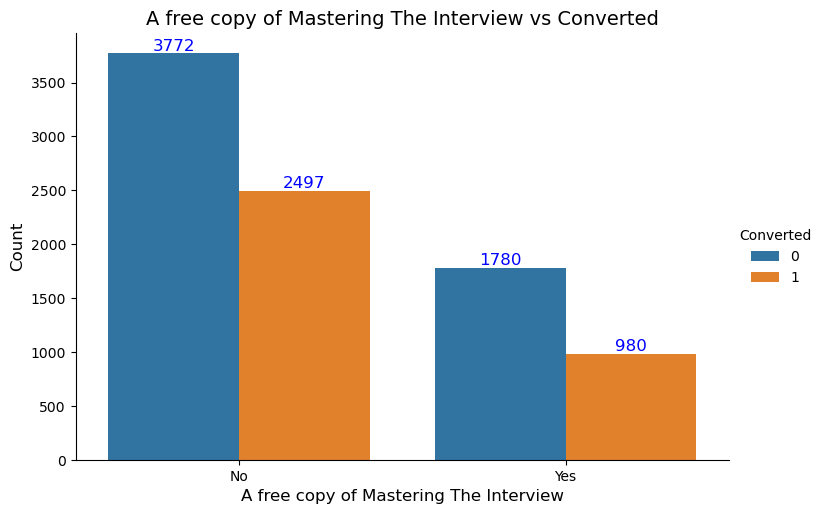

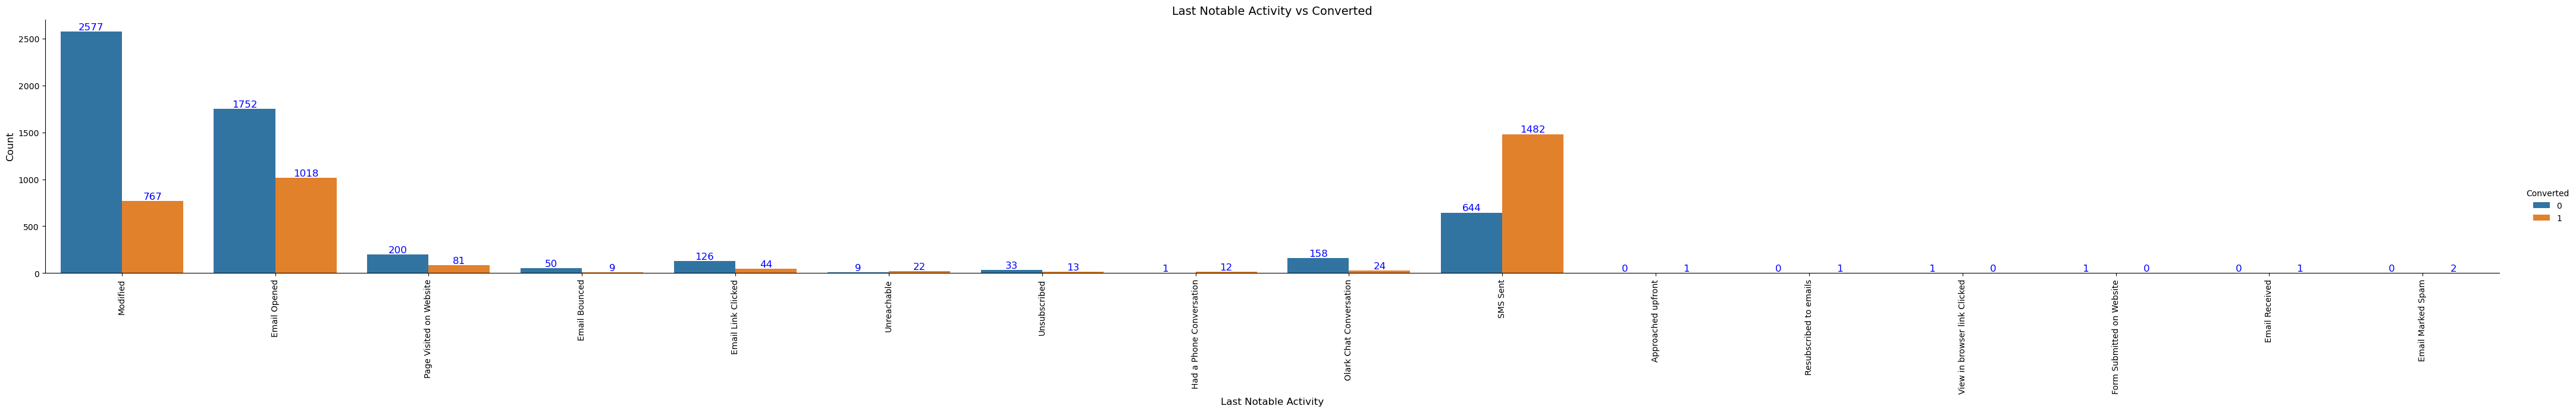

In [51]:
pd.options.display.max_rows = 10000
for i in col_graph:
    n = df1[i].value_counts().count()
    plot= sns.catplot(x=i, kind='count', hue='Converted', data=df1, aspect=(n+1)/2)
    plt.title('%s vs Converted' % i , fontsize=14)
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    if n>3:
        plt.xticks(rotation=90)
    ax = plot.facet_axis(0,0)
    #print the count
    ax = plot.facet_axis(0,0)
    for p in ax.patches:
    
        if np.isnan(p.get_height()):
            height = 0
        else:
            height = p.get_height()
    
        height = int(height)
        ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
    plt.show()
    

In [52]:
# Insightes from above graphs
# 1- Lead Origin - Maximum Conversion happened from Landing Page Submission, also one request from Quick Add Form and which is converted.
# 2- Lead Source - Major conversion is from Google
# 3- Do Not Email - Major conversion is from enails that have been send. (40%)
# 4- Do Not Call - Major conversion is happened when called to lead , however 2 customers convered while they selected do not call.
# 5- Last Activity - Major conversion happened when SMS send.
# 6- What is your current occupation - High conversion for progessional working people, also 10 conversion for housewife (100%)
# 7- Search - High conversion rate for leads for those who are not through search.
# 8- Newspaper Article - Only 'NO' category , so we can drop this column.
# 9- X Education Forums - Only 'NO' category , so we can drop this column.
# 10- Newspaper - Only one row has 'Yes', and that too is not converted , and all other is 'NO' selected , so we can drop the column.
# 11- Digital Advertisement - 1 lead converetd out of 2 which came from digital advertisement
# 12- Through Recommendations - It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted
# 13- A free copy of Mastering The Interview - High conversion rate for leads who do not wants free copy of mastering interview.
# 14- Last Notable Activity - Major conversion happened when SMS send.


In [53]:
# From above we can drop below columns.
# 1. Newspaper Article 
# 2. X Education Forums 
# 3. Newspaper 
df1=df1.drop(['Newspaper Article','X Education Forums','Newspaper'], axis=1)
df1.shape

(9029, 17)

#### Step 4 : - Data Preparation 

In [54]:
# Creating Dummies 
# Converting some binary variables (Yes/No) to (1/0)
variablelist=[]
for col in df1.columns:
    a=df1[df1[col]=='Yes'][col].value_counts()
    if len(a) > 0:
        #print(col)
        variablelist.append(col)
print(variablelist)

['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


In [55]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})
df1[variablelist]= df1[variablelist].apply(binary_map)

In [56]:
# Creating dummy variables

# Lead Origin :- 
df_lead_origin = pd.get_dummies(df1['Lead Origin'], prefix='LeadOrgin', drop_first=True)

# Lead Source :-
df_lead_source = pd.get_dummies(df1['Lead Source'], prefix='LeadSource', drop_first=True)

# Last Activity :-
df_last_activity = pd.get_dummies(df1['Last Activity'], prefix='LastActivity', drop_first=True)

# What is your current occupation :-
df_occupation = pd.get_dummies(df1['What is your current occupation'], prefix='CurrentOccupation', drop_first=True)

# Last Notable Activity :-
df_notable_activity = pd.get_dummies(df1['Last Notable Activity'], prefix='NotableActivity', drop_first=True)

df1 = pd.concat([df1, df_lead_origin, df_lead_source, df_last_activity, df_occupation, df_notable_activity], axis=1)

df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,NotableActivity_Form Submitted on Website,NotableActivity_Had a Phone Conversation,NotableActivity_Modified,NotableActivity_Olark Chat Conversation,NotableActivity_Page Visited on Website,NotableActivity_Resubscribed to emails,NotableActivity_SMS Sent,NotableActivity_Unreachable,NotableActivity_Unsubscribed,NotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


In [57]:
# Remove some columns
# 1. Prospect ID
# 2. Lead Number
# 3. Lead Origin
# 4. Lead Source
# 5. Last Activity
# 6. What is your current occupation
# 7. Last Notable Activity

df1 = df1.drop(['Prospect ID','Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity'], axis=1)

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Do Not Email                                  9029 non-null   int64  
 1   Do Not Call                                   9029 non-null   int64  
 2   Converted                                     9029 non-null   int64  
 3   TotalVisits                                   9029 non-null   float64
 4   Total Time Spent on Website                   9029 non-null   int64  
 5   Page Views Per Visit                          9029 non-null   float64
 6   Search                                        9029 non-null   int64  
 7   Digital Advertisement                         9029 non-null   int64  
 8   Through Recommendations                       9029 non-null   int64  
 9   A free copy of Mastering The Interview        9029 non-null   i

In [60]:
# check null value
missing_percentage(df1)

round(100*(df1.isnull().sum()/len(df1)), 2)

Do Not Email                                    0.0
Do Not Call                                     0.0
Converted                                       0.0
TotalVisits                                     0.0
Total Time Spent on Website                     0.0
Page Views Per Visit                            0.0
Search                                          0.0
Digital Advertisement                           0.0
Through Recommendations                         0.0
A free copy of Mastering The Interview          0.0
LeadOrgin_Landing Page Submission               0.0
LeadOrgin_Lead Add Form                         0.0
LeadOrgin_Lead Import                           0.0
LeadOrgin_Quick Add Form                        0.0
LeadSource_Direct Traffic                       0.0
LeadSource_Facebook                             0.0
LeadSource_Google                               0.0
LeadSource_Live Chat                            0.0
LeadSource_NC_EDM                               0.0
LeadSource_O

In [61]:
# Check shape of the dataframe
df1.shape

(9029, 71)

#### Step 5 : Test-Train_split

In [62]:
# Feature vaiable to X
X = df1.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrgin_Landing Page Submission,...,NotableActivity_Form Submitted on Website,NotableActivity_Had a Phone Conversation,NotableActivity_Modified,NotableActivity_Olark Chat Conversation,NotableActivity_Page Visited on Website,NotableActivity_Resubscribed to emails,NotableActivity_SMS Sent,NotableActivity_Unreachable,NotableActivity_Unsubscribed,NotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [63]:
# Independend feature to y
y = df1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [64]:
# Splitting the data into train - test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=100)

#### Step 6 : Rescaling the features with MinMaxScaler

In [68]:
X_train.describe()
# Here TotalVisits , Total Time Spend on Website, Page Views Per Visit requires rescaling 
# 

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrgin_Landing Page Submission,...,NotableActivity_Form Submitted on Website,NotableActivity_Had a Phone Conversation,NotableActivity_Modified,NotableActivity_Olark Chat Conversation,NotableActivity_Page Visited on Website,NotableActivity_Resubscribed to emails,NotableActivity_SMS Sent,NotableActivity_Unreachable,NotableActivity_Unsubscribed,NotableActivity_View in browser link Clicked
count,6320.000000,6320.0,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,...,6320.0,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000
mean,0.078006,0.0,3.112025,481.907595,2.247823,0.001582,0.000158,0.000633,0.306487,0.527690,...,0.0,0.001582,0.373418,0.019620,0.032278,0.000158,0.234019,0.003481,0.004589,0.000158
std,0.268203,0.0,2.820546,544.992500,1.832696,0.039750,0.012579,0.025152,0.461071,0.499272,...,0.0,0.039750,0.483750,0.138702,0.176753,0.012579,0.423418,0.058902,0.067589,0.012579
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,1.000000,9.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,3.000000,240.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,4.000000,924.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,16.000000,2272.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.describe()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrgin_Landing Page Submission,...,NotableActivity_Form Submitted on Website,NotableActivity_Had a Phone Conversation,NotableActivity_Modified,NotableActivity_Olark Chat Conversation,NotableActivity_Page Visited on Website,NotableActivity_Resubscribed to emails,NotableActivity_SMS Sent,NotableActivity_Unreachable,NotableActivity_Unsubscribed,NotableActivity_View in browser link Clicked
count,6320.000000,6320.0,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,...,6320.0,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000
mean,0.078006,0.0,0.194502,0.212107,0.280978,0.001582,0.000158,0.000633,0.306487,0.527690,...,0.0,0.001582,0.373418,0.019620,0.032278,0.000158,0.234019,0.003481,0.004589,0.000158
std,0.268203,0.0,0.176284,0.239873,0.229087,0.039750,0.012579,0.025152,0.461071,0.499272,...,0.0,0.039750,0.483750,0.138702,0.176753,0.012579,0.423418,0.058902,0.067589,0.012579
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.062500,0.004291,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.187500,0.105634,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.250000,0.406690,0.375000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Step 7 Model Building 

In [72]:
# Logistic regression model

lm1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())

print(lm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6258
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 18 Jun 2023   Deviance:                   1.5547e+05
Time:                        20:51:50   Pearson chi2:                 7.60e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

#### Step 8 : - Automatic Feature selection using RFE

In [73]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [75]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [77]:
rfe_df = pd.DataFrame({'Feature': X_train.columns, 'Status': rfe.support_, 'Rank': rfe.ranking_})

# Top 20 features using RFE
print(rfe_df.sort_values(by='Rank'))

                                         Feature  Status  Rank
0                                   Do Not Email    True     1
54        CurrentOccupation_Working Professional    True     1
18                         LeadSource_Olark Chat    True     1
50                     CurrentOccupation_No Info    True     1
58                  NotableActivity_Email Opened    True     1
32                LastActivity_Converted to Lead    True     1
61      NotableActivity_Had a Phone Conversation    True     1
33                    LastActivity_Email Bounced    True     1
62                      NotableActivity_Modified    True     1
63       NotableActivity_Olark Chat Conversation    True     1
10                       LeadOrgin_Lead Add Form    True     1
49                   CurrentOccupation_Housewife    True     1
64       NotableActivity_Page Visited on Website    True     1
40                          LastActivity_No Info    True     1
41          LastActivity_Olark Chat Conversation    Tru

In [78]:
# Features given by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrgin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_No Info', 'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Info',
       'CurrentOccupation_Working Professional',
       'NotableActivity_Email Link Clicked', 'NotableActivity_Email Opened',
       'NotableActivity_Had a Phone Conversation', 'NotableActivity_Modified',
       'NotableActivity_Olark Chat Conversation',
       'NotableActivity_Page Visited on Website'],
      dtype='object')

#### Rebuilding Modle 2

In [81]:
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train, X_train_sm, sm.families.Binomial()).fit()
print(lm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2519.2
Date:                Sun, 18 Jun 2023   Deviance:                       5038.4
Time:                        21:19:56   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4128
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [82]:
#Calculating the VIF for new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X= X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,13.14
4,Page Views Per Visit,2.74
2,TotalVisits,2.38
6,LeadSource_Olark Chat,2.23
18,NotableActivity_Modified,2.14
5,LeadOrgin_Lead Add Form,1.90
11,LastActivity_Olark Chat Conversation,1.85
9,LastActivity_Email Bounced,1.78
1,Do Not Email,1.77
16,NotableActivity_Email Opened,1.64


In [83]:
# CurrentOccupation_Housewife has high P-Value , we drop this feature and rebuild the modle

#### Rebuild Model 3

In [84]:
col = col.drop('CurrentOccupation_Housewife')

In [85]:
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrgin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_No Info', 'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_No Info', 'CurrentOccupation_Working Professional',
       'NotableActivity_Email Link Clicked', 'NotableActivity_Email Opened',
       'NotableActivity_Had a Phone Conversation', 'NotableActivity_Modified',
       'NotableActivity_Olark Chat Conversation',
       'NotableActivity_Page Visited on Website'],
      dtype='object')

In [86]:
X_train_sm = sm.add_constant(X_train[col])
lm3 = sm.GLM(y_train, X_train_sm, sm.families.Binomial()).fit()
print(lm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.0
Date:                Sun, 18 Jun 2023   Deviance:                       5047.9
Time:                        21:24:03   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4119
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [87]:
# NotableActivity_Had a Phone Conversation has high P-value 0.076 and hence need to remove

#### Rebuilding Model 4

In [88]:
col = col.drop('NotableActivity_Had a Phone Conversation')
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrgin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_No Info', 'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_No Info', 'CurrentOccupation_Working Professional',
       'NotableActivity_Email Link Clicked', 'NotableActivity_Email Opened',
       'NotableActivity_Modified', 'NotableActivity_Olark Chat Conversation',
       'NotableActivity_Page Visited on Website'],
      dtype='object')

In [89]:
X_train_sm = sm.add_constant(X_train[col])
lm4 = sm.GLM(y_train, X_train_sm, sm.families.Binomial()).fit()
print(lm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.2
Date:                Sun, 18 Jun 2023   Deviance:                       5052.4
Time:                        21:26:02   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4115
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [90]:
#Calculating the VIF for new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X= X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,13.10
4,Page Views Per Visit,2.74
2,TotalVisits,2.38
6,LeadSource_Olark Chat,2.23
16,NotableActivity_Modified,2.14
5,LeadOrgin_Lead Add Form,1.90
11,LastActivity_Olark Chat Conversation,1.85
9,LastActivity_Email Bounced,1.78
1,Do Not Email,1.77
15,NotableActivity_Email Opened,1.63


In [91]:
# Modle 4 looks stable with good p-values and good VIF

In [93]:
# Get predicted values on train set

y_train_pred = lm4.predict(X_train_sm)
y_train_pred[:10]

5493    0.108781
8064    0.106462
4716    0.013542
9117    0.345961
2402    0.519946
1796    0.034713
1120    0.034713
253     0.051086
1491    0.117917
2004    0.401175
dtype: float64

In [102]:
# Reshape
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10878063, 0.10646214, 0.01354181, 0.34596136, 0.51994603,
       0.03471349, 0.03471349, 0.05108561, 0.11791742, 0.40117539])

In [103]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_probability': y_train_pred})
y_train_pred_final['Lead_No'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_probability,Lead_No
0,0,0.108781,5493
1,0,0.106462,8064
2,0,0.013542,4716
3,0,0.345961,9117
4,1,0.519946,2402


In [106]:
# Add new column 'Predicted' with 1 if probabilty greater that 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_probability.map(lambda x : 1 if x > 0.5 else 0)

In [107]:
y_train_pred_final.head()

,Converted,Converted_probability,Lead_No,Predicted
0,0,0.108781,5493,0
1,0,0.106462,8064,0
2,0,0.013542,4716,0
3,0,0.345961,9117,0
4,1,0.519946,2402,1


###### Lets check confusion matrix and accuracy

In [108]:
from sklearn import metrics

In [109]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3465  444]
 [ 702 1709]]


In [110]:
#                       Prediction
#   Actual       No-Predicted           Predicted
#  No-Predicted    	3465                	444
#     Predicted  	702                 	1709
#                	TN                  	FP
#               	FN                  	TP

In [111]:
# Accuracy Check

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8186708860759494


###### Accuracy ration is 81% which is good.

###### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Sensitivity
# TP / (TP+FN)
print(TP/float(TP+FN))

0.708834508502696


In [114]:
# Specificity
# TN / (TN + FN )
TN/float(TN+FN)

0.8315334773218143

In [115]:
# Calculate false postive rate - predicting non conversion when leads have converted
print(FP/float(TN+FP))

0.113584036838066


In [116]:
# positive predictive value 

print (TP / float(TP+FP))

0.793776126335346


In [117]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8315334773218143


### Step 9: Plotting the ROC Curve
An ROC curve demonstrates several things:

. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).                                           
. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.        
. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability, drop_intermediate = False )

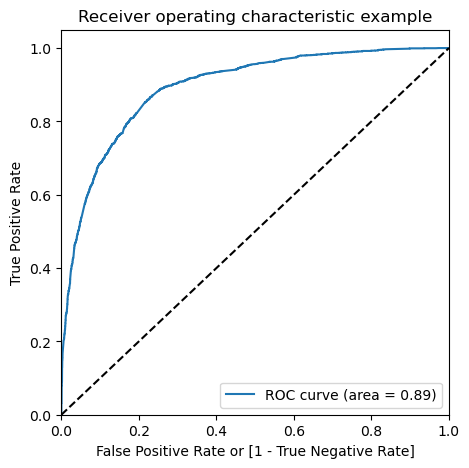

In [120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

#### Step 10: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [121]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Lead_No,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.108781,5493,0,1,1,0,0,0,0,0,0,0,0
1,0,0.106462,8064,0,1,1,0,0,0,0,0,0,0,0
2,0,0.013542,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.345961,9117,0,1,1,1,1,0,0,0,0,0,0
4,1,0.519946,2402,1,1,1,1,1,1,1,0,0,0,0


In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.615506  0.974699  0.393963
0.2   0.2  0.767563  0.912899  0.677923
0.3   0.3  0.805063  0.867690  0.766436
0.4   0.4  0.816456  0.788055  0.833973
0.5   0.5  0.818671  0.708835  0.886416
0.6   0.6  0.809810  0.631273  0.919928
0.7   0.7  0.787816  0.521360  0.952162
0.8   0.8  0.762658  0.426794  0.969813
0.9   0.9  0.716614  0.279137  0.986442


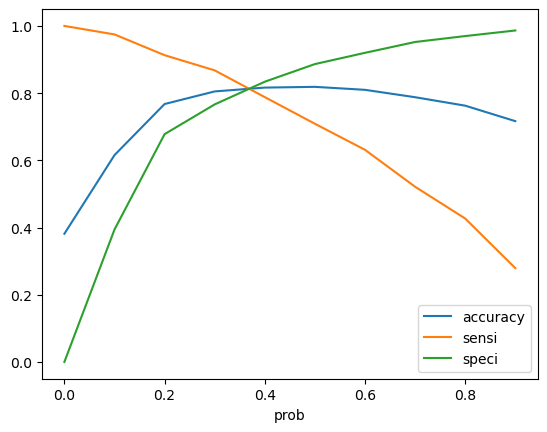

In [127]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_probability,Lead_No,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.108781,5493,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.106462,8064,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.013542,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.345961,9117,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.519946,2402,1,1,1,1,1,1,1,0,0,0,0,1


In [137]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8155063291139241

In [138]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3228,  681],
       [ 485, 1926]], dtype=int64)

In [139]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [140]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.79883865615927

In [141]:
# Let us calculate specificity
TN / float(TN+FP)

0.8257866462010744

In [142]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17421335379892555


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8693778615674657


In [144]:
# Lets check if our final modle has predicted 80% of conversion as per business requirement.

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1926
0     485
Name: final_predicted, dtype: int64

In [145]:
print(1926/(1926+485))

0.79883865615927


#### Hence we can see that the final prediction of conversions have a target of 80% (79.88%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

### Precision and Recall

In [146]:
#Looking at the confusion matrix again

In [148]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3465,  444],
       [ 702, 1709]], dtype=int64)

Precision                    
TP / TP + FP

In [149]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.793776126335346

Recall       
TP / TP + FN 

In [152]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.708834508502696

Using sklearn utilities for the same

In [153]:
from sklearn.metrics import precision_score, recall_score

In [154]:
# Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.793776126335346

In [155]:
# Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.708834508502696

#### Precision and recall tradeoff

In [156]:
from sklearn.metrics import precision_recall_curve

In [157]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
 5       0
 6       0
 7       0
 8       0
 9       1
 10      0
 11      0
 12      0
 13      0
 14      0
 15      1
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      1
 24      1
 25      1
 26      1
 27      0
 28      0
 29      0
 30      1
 31      0
 32      0
 33      0
 34      0
 35      0
 36      1
 37      1
 38      1
 39      0
 40      0
 41      1
 42      0
 43      1
 44      0
 45      1
 46      0
 47      0
 48      0
 49      0
 50      0
 51      0
 52      1
 53      0
 54      1
 55      1
 56      1
 57      1
 58      1
 59      0
 60      1
 61      0
 62      1
 63      0
 64      1
 65      0
 66      0
 67      0
 68      0
 69      0
 70      1
 71      1
 72      0
 73      0
 74      1
 75      1
 76      0
 77      0
 78      1
 79      1
 80      1
 81      0
 82      1
 83      1
 84      1
 85      0
 86      1
 87      0
 88      0
 89      1
 90      0

In [161]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

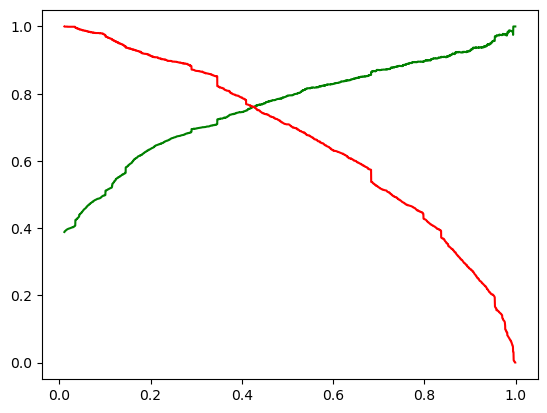

In [162]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making prediction on Test set

In [163]:
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrgin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_No Info', 'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_No Info', 'CurrentOccupation_Working Professional',
       'NotableActivity_Email Link Clicked', 'NotableActivity_Email Opened',
       'NotableActivity_Modified', 'NotableActivity_Olark Chat Conversation',
       'NotableActivity_Page Visited on Website'],
      dtype='object')

In [164]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_test.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrgin_Landing Page Submission,...,NotableActivity_Form Submitted on Website,NotableActivity_Had a Phone Conversation,NotableActivity_Modified,NotableActivity_Olark Chat Conversation,NotableActivity_Page Visited on Website,NotableActivity_Resubscribed to emails,NotableActivity_SMS Sent,NotableActivity_Unreachable,NotableActivity_Unsubscribed,NotableActivity_View in browser link Clicked
count,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,...,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.0,2709.000000,2709.000000,2709.000000,2709.0
mean,0.077150,0.000738,0.189323,0.213905,0.272045,0.001107,0.000369,0.000738,0.303802,0.509782,...,0.000369,0.001107,0.363234,0.021410,0.028424,0.0,0.238834,0.003322,0.006275,0.0
std,0.266879,0.027166,0.172208,0.243457,0.225106,0.033266,0.019213,0.027166,0.459983,0.499997,...,0.019213,0.033266,0.481020,0.144774,0.166211,0.0,0.426450,0.057554,0.078983,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.062500,0.000440,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.187500,0.109155,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.250000,0.412852,0.375000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,0.975792,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


In [165]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrgin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_No Info,LastActivity_Olark Chat Conversation,CurrentOccupation_No Info,CurrentOccupation_Working Professional,NotableActivity_Email Link Clicked,NotableActivity_Email Opened,NotableActivity_Modified,NotableActivity_Olark Chat Conversation,NotableActivity_Page Visited on Website
4664,0,0.0000,0.000000,0.00000,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5394,0,0.2500,0.072183,0.16625,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1595,0,0.2500,0.515405,0.50000,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2111,0,0.4375,0.229754,0.87500,0,0,0,0,0,0,0,1,0,0,1,0,0,0
9182,0,0.0000,0.000000,0.00000,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [166]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [167]:
y_test_pred = lm4.predict(X_test_sm)

In [168]:
y_test_pred[:10]

4664    0.345961
5394    0.185089
1595    0.915106
2111    0.097895
9182    0.289513
1055    0.491813
541     0.066297
446     0.976546
3728    0.015753
4249    0.008362
dtype: float64

In [169]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4664,0.345961
5394,0.185089
1595,0.915106
2111,0.097895
9182,0.289513


In [170]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [171]:
# Putting LeadId to index
y_test_df['Lead_No'] = y_test_df.index

In [172]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [173]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [174]:
y_pred_final.head()

,Converted,Lead_No,0
0,0,4664,0.345961
1,0,5394,0.185089
2,1,1595,0.915106
3,0,2111,0.097895
4,0,9182,0.289513


In [175]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [179]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Lead_No','Converted','Converted_Prob'], axis=1)

In [180]:
y_pred_final.head()

,Lead_No,Converted,Converted_Prob
0,4664,0,0.345961
1,5394,0,0.185089
2,1595,1,0.915106
3,2111,0,0.097895
4,9182,0,0.289513


In [181]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.38%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [182]:
y_pred_final.head()

,Lead_No,Converted,Converted_Prob,final_predicted
0,4664,0,0.345961,0
1,5394,0,0.185089,0
2,1595,1,0.915106,1
3,2111,0,0.097895,0
4,9182,0,0.289513,0


In [183]:
# check if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    858
0    208
Name: final_predicted, dtype: int64

In [184]:
858/float(858+208)

0.8048780487804879

#### Hence we can see that the final prediction of conversions have a target rate of 80% (80.48%)  


### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [185]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8135843484680694

In [186]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1346,  297],
       [ 208,  858]], dtype=int64)

In [187]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [188]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8048780487804879

In [189]:
# Let us calculate specificity
TN / float(TN+FP)

0.8192331101643335

#### Precision and Recall metrics for the test set

In [190]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7428571428571429
recall  0.8048780487804879


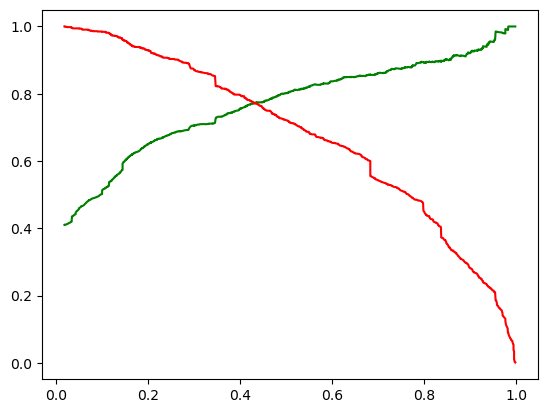

In [191]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()